# TP: Machine Learning (SIA_3611)

## TP2: Classification (4h) 

### Students:
### - Nicolas LASSO
### - Rayane GHILENE

by Clément Bouvier 

In machine learning, classification is related to supervised learning approaches in which the algorithm fits from an annotated set of data. This learning phase is followed by a validation phase to evaluate the classification model through several metrics. Once the model is correctly validated, a generalization phase is used to classify new data.

The given dataset was produced by the World Health Organization. It pooled the evolution of 20 features for 15 years and among numerous countries. One of the goals of this TP2 is to visualize feature space and try to predict the development of countries.

**Objectives:**
- Visualize the feature space
- Discuss the feasibility of feature space separation
- Normalize the datasets
- Train a K-NN, a decision tree, a random forest and a SVM
- Visualize the decision boundary for each method
- Create a test dataset
- Compute AUC scores on a evaluation dataset
- Tune hyperparameters
- Visualize the modification of decision boundary for each tuning
- Discuss the limits of the four implementations


## STEP 1: Feature space visualization

You will work on the WHO dataset in the year 2000. This first step consists of choosing two features to perform a classification.

**TO DO 1.1**

Execute the following cells

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

df = pd.read_csv("/workspaces/Exp/data/Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

df1 = df[(df.Year == 2000)]

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles                  

<module 'matplotlib.pyplot' from '/home/codespace/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

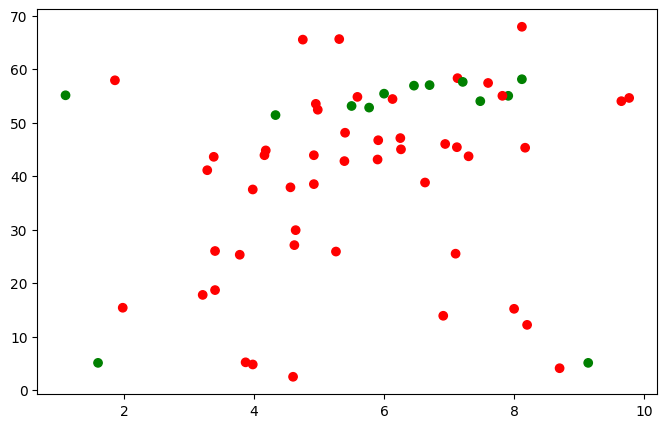

In [21]:
df_X = df1[['Total_expenditure', 'BMI']]
df_Status = df1[['Status']]

df_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])

np1 = df_X.to_numpy()
plt.figure(figsize=(8, 5))
plt.scatter(np1[:,0], np1[:,1], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt

### **QUESTION 1**

Why was the label status binarized?

The label status has only two attributes "Developing" & "*Developed", which means that the model only needs to make binary decisions based on whether a feature is above or below a certain threshold.

Is this feature space easily separable? Justify your 

No, this feature space is not easily separable, because there is no clear line/cluster that separates the two classes present in the data

**TO CODE 1.2**

Plot Total expenditure against Schooling

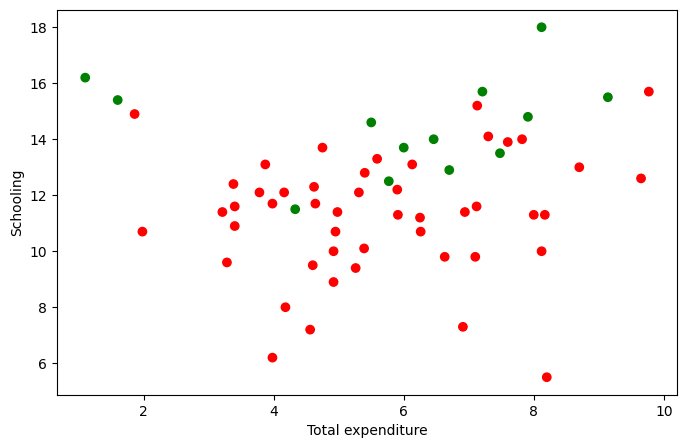

In [22]:

# Plot total expenditure vs Schooling

plt.figure(figsize=(8, 5))
plt.scatter(df1['Total_expenditure'], df1['Schooling'], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt.xlabel('Total expenditure')
plt.ylabel('Schooling')
plt.show()


**TO CODE 1.3**

Plot Life Expectancy against Schooling

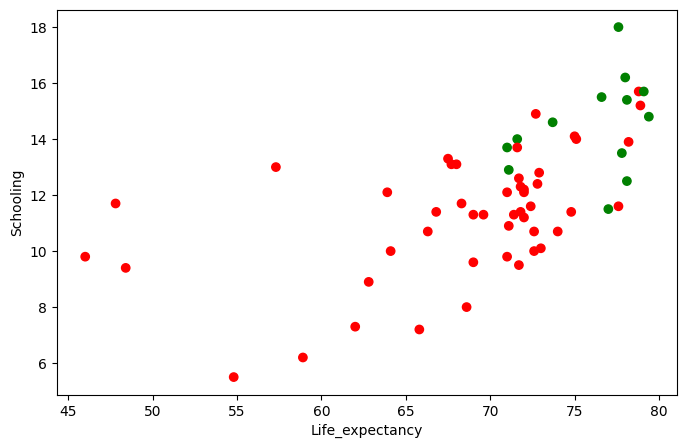

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(df1['Life_expectancy'], df1['Schooling'], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt.xlabel('Life_expectancy')
plt.ylabel('Schooling')
plt.show()

### **QUESTION 2**

What would be the best features to use? Justify your response

It would be best to use the "Life_expectancy" and the "Schooling" features

## STEP 2: Dataset normalization

To classify, the values in the learning dataset must be normalized (aka between 0 and 1). This normalization can be performed through various ways.

**TO CODE 2.1**

Normalize df_X. This normalization should perfectly frame the data (aka the minimum and the maximum values of each feature should be respectively 0 and 1).

In [24]:

#Normalize df_X such that the min value is 0 and the max value is 1

df_X = df1[['Life_expectancy', 'Schooling']] 


df_X_norm = (df_X - df_X.min()) / (df_X.max() - df_X.min())
df_X_norm.head()


np_X_norm = df_X_norm.to_numpy()

np_Y = df_Y.to_numpy()

**TO DO 2.2**

Each following cell performs a learning step and an AUC scores computation. For each classifier, several parameters have been chosen.

AUC score:  0.9294871794871794


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


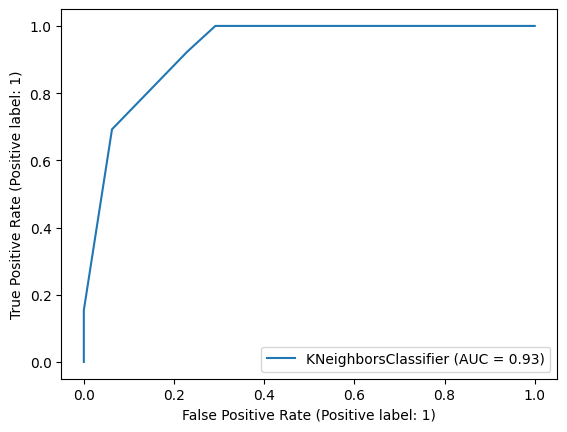

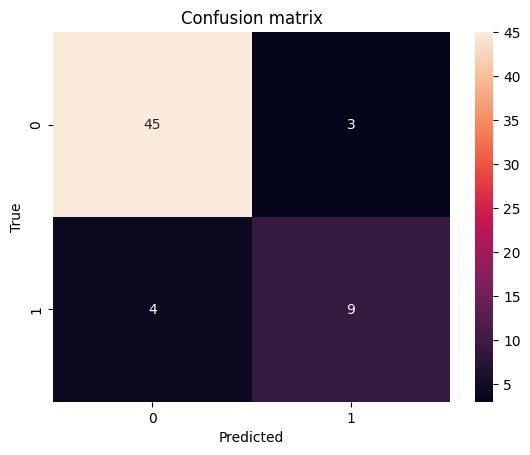

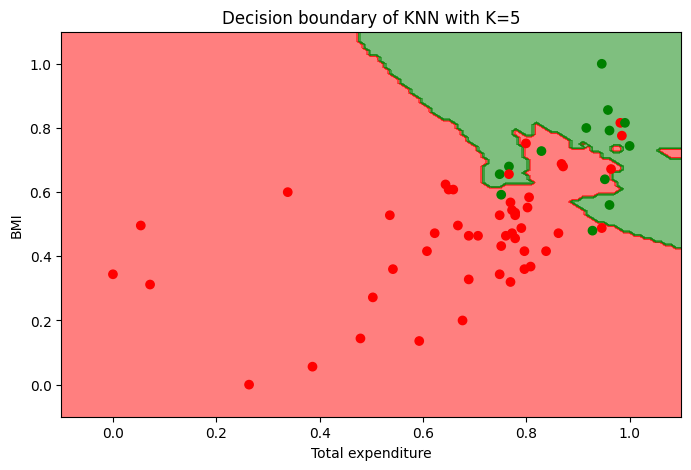

,Life_expectancy,Schooling
15,54.8,5.5
31,72.6,10.7
111,72.0,11.2
143,78.1,15.4
239,68.0,13.1


In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier

clf1 = KNeighborsClassifier(n_neighbors=5)
clf1.fit(np_X_norm, np_Y)

np_Y_pred = clf1.predict_proba(df_X_norm)


print("AUC score: ", roc_auc_score(np_Y, np_Y_pred[:,1]))
RocCurveDisplay.from_estimator(clf1, np_X_norm, np_Y)
plt.show()



from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(df_X_norm, np_Y, clf):
    np_Y_pred = clf.predict(df_X_norm) 
    cm = confusion_matrix(np_Y, np_Y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion matrix')
    plt.show()


#Plot the decision boundary

from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier


def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.01
    cmap = ListedColormap(['red', 'green'])
    x_min, x_max = X.min(axis=0) - 0.1, X.max(axis=0) + 0.1
    y_min, y_max = Y.min(axis=0) - 0.1, Y.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.arange(x_min[0], x_max[0], h), np.arange(y_min[0], y_max[0], h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
    plt.xlabel('Total expenditure')
    plt.ylabel('BMI')
    plt.title('Decision boundary of KNN with K=5')
    plt.scatter(X[:, 0], X[:, 1], c=np.squeeze(Y), cmap=cmap)
    plt.show()

plot_confusion_matrix(np_X_norm, np_Y, clf1)
plot_decision_boundary(clf1, np_X_norm, np_Y)

#plot df_X
df_X.head()

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


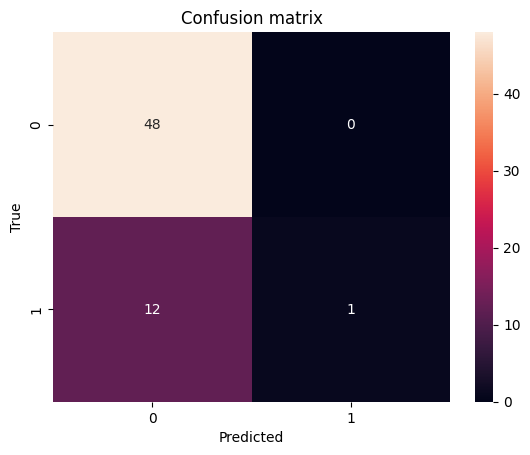

0.9198717948717949


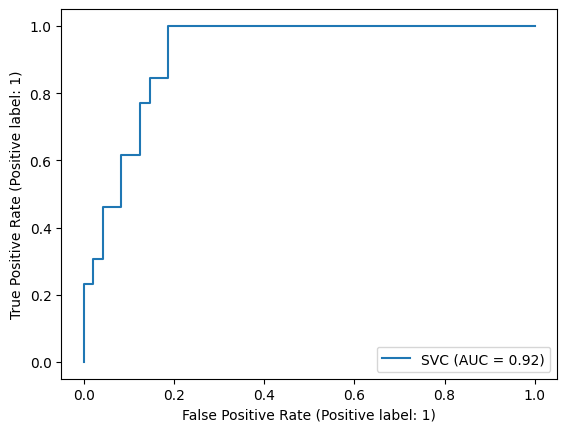

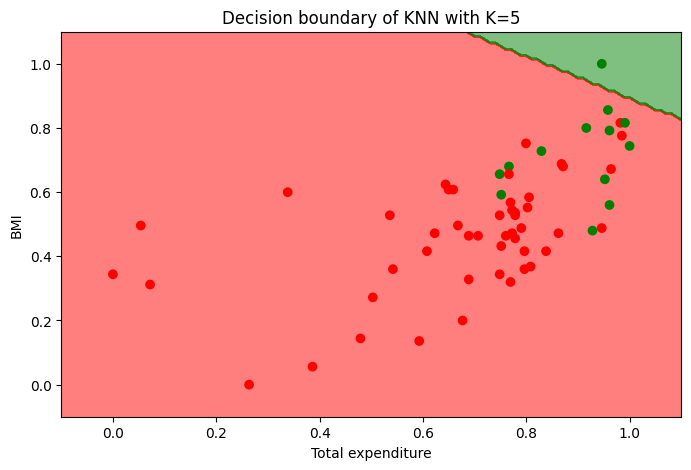

In [26]:
from sklearn.svm import SVC

clf2 = SVC(C=2.0, kernel='linear', probability = True)
clf2.fit(np_X_norm, np_Y)

np_Y_pred = clf2.predict_proba(df_X_norm)

plot_confusion_matrix(np_X_norm, np_Y, clf2)


print(roc_auc_score(np_Y, np_Y_pred[:,1]))
RocCurveDisplay.from_estimator(clf2, np_X_norm, np_Y)
plt.show()
plot_decision_boundary(clf2, np_X_norm, np_Y)



/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.9799679487179488


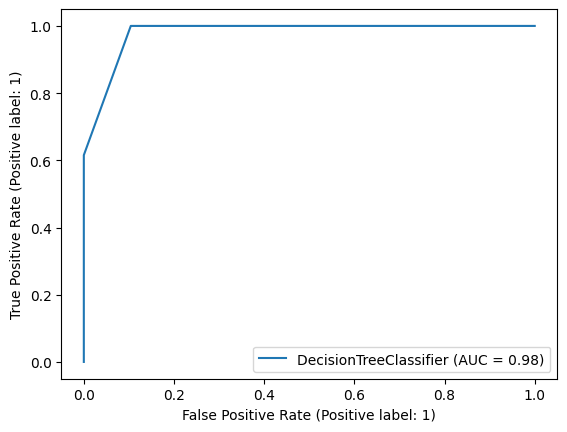

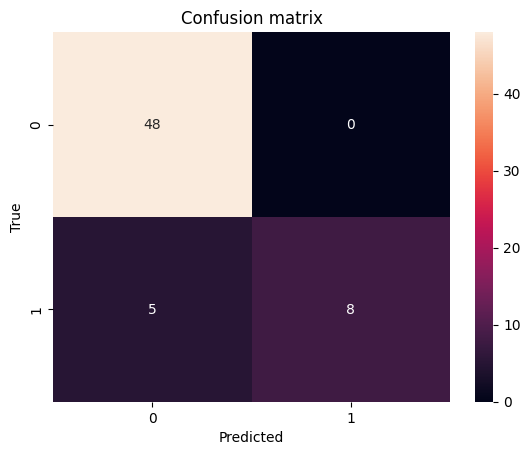

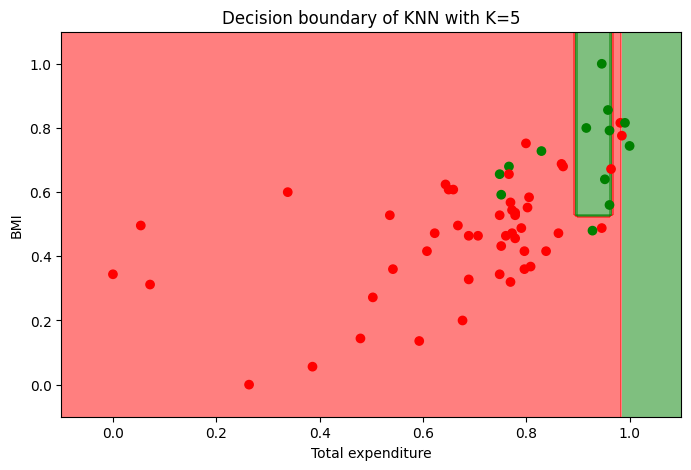

In [27]:
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier(max_depth=3)
clf3.fit(np_X_norm, np_Y)

np_Y_pred = clf3.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
RocCurveDisplay.from_estimator(clf3, np_X_norm, np_Y)
plt.show()


plot_confusion_matrix(np_X_norm, np_Y, clf3)

plot_decision_boundary(clf3, np_X_norm, np_Y)



/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9839743589743589


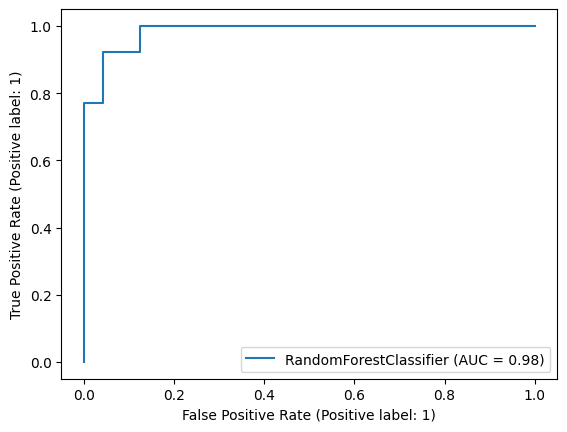

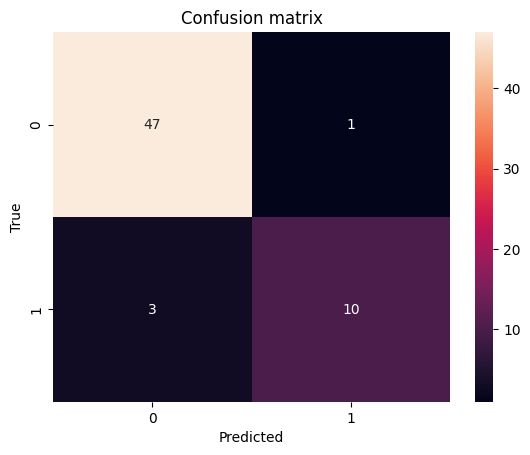

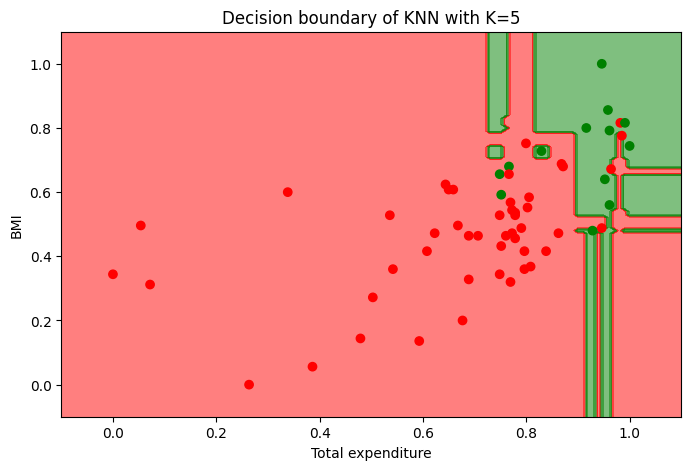

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier(n_estimators=100, max_depth=3)
clf4.fit(np_X_norm, np_Y)

np_Y_pred = clf4.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
RocCurveDisplay.from_estimator(clf4, np_X_norm, np_Y)
plt.show()


plot_confusion_matrix(np_X_norm, np_Y, clf4)

plot_decision_boundary(clf4, np_X_norm, np_Y)



**QUESTION 3**

Identify each used classifiers and specify the used parameters

Describe and explain the results obtained for each ROC curve. What is the relation between the AUC and the ROC curve ? According to the ROC curve, which model is the best if we want to maximize the sensitivity ? And if we want to maximize the specificity ? Compare those results with the AUC. 

- K-Nearest Neighbors (KNeighborsClassifier): You should specify the value of 'k' and the distance metric used.
- Support Vector Classifier (SVC): Kernel function, and kernel parameters
- Decision Tree Classifier (DecisionTreeClassifier): Decision criteria and max depth
- Random Forest Classifier (RandomForestClassifier): Mention the number of trees in the forest and max depth

### ROC Curve

This curve illustrates the trade-off between the True Positive Rate (Sensitivity) and the False Positive Rate (1 - Specificity) for different threshold values. The curve represents the classifier's performance at various classification thresholds.


### AUC Curve

AUC is a single numeric value that summarizes the overall performance of a classifier. It quantifies the area under the ROC curve.


For a two-classes problem, a decision boundary is a hypersurface which splits the feature space between two sets (for each class). Then this surface is composed of all the equiprobability points in the feature space.

**TO DO 2.3**

Plot the decision boundary with df_X for each classifiers

<module 'matplotlib.pyplot' from '/home/codespace/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

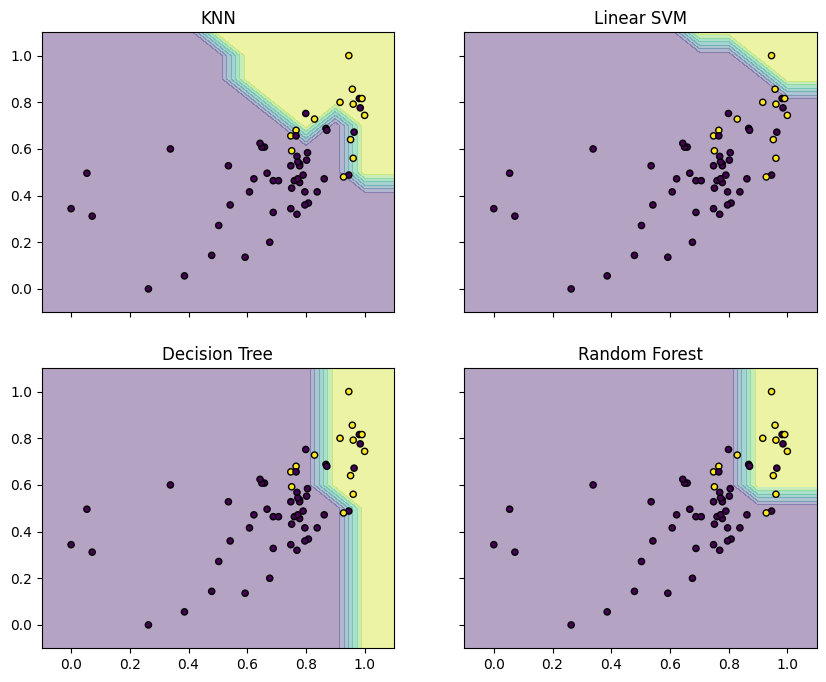

In [29]:
from itertools import product

x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, clf4],
                        ['KNN', 'Linear SVM', 'Decision Tree', 'Random Forest']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt

**QUESTION 4**

What is the main problem of the classification step with this dataset?

That there's no way of separating both Datasets without errors, this is because the clusters that overlap present the same variance in the intercepting area.

In your opinion, which classifier is better suited for this classification task? Justify your response

Out of the four classifiers the best ones are the "Random Forest Classifier" and the "Decision Tree Classifier" since they both have an AUC score of 0.98, the desicion Tree slightly outperformed when plotting the confusion matrix

## STEP 3: Biases correction and model tuning

In this part, you will focus on improving the AUC scores of the four methods.

Firstable, you will weigh the classes to balance the classifier response. Then you will tune various hyperparameters.

**TO CODE 3.1**

Compute the percentage of "Developed" class against the size the np_Y.

In [30]:

developed_count = np.sum(np_Y == 1)
percentage_developed = (developed_count / len(np_Y)) * 100

print("Percentage of 'Developed' class:", percentage_developed, "%")

Percentage of 'Developed' class: 21.311475409836063 %


SVM, Decision Tree and Random Forest algorithms have a parameter named:

```
class_weight
```
Here is a extract from sklearn documentation:

**class_weight** dict, list of dict or “balanced”, default=None

Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.


**QUESTION 5**

What would be the weight values for each class?

In [46]:
#We know the class 0 is more common, and we can assume that it would receive 10% of the weight
#Being this class 90% of the total data. In the next cell we confirm this by printing the assigned weights

print("Number of class 1 instances:", developed_count)
print("Number of class 0 instances:", len(np_Y) - developed_count)



Number of class 1 instances: 13
Number of class 0 instances: 117


**TO CODE 3.2**

Balance SVM, Decision Tree and Random Forest classifiers and plot the decision boundaries

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


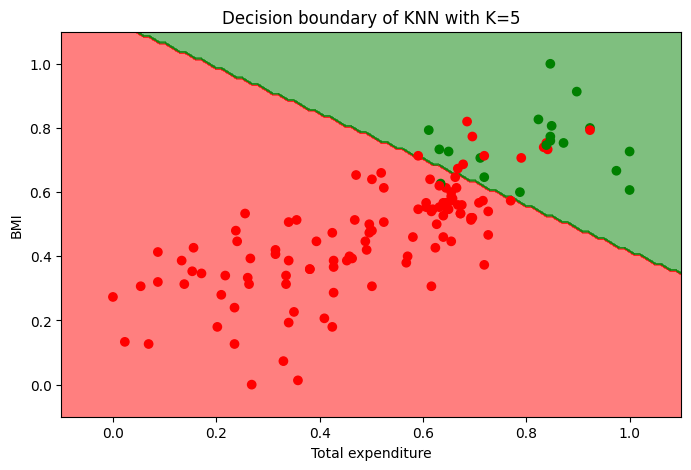

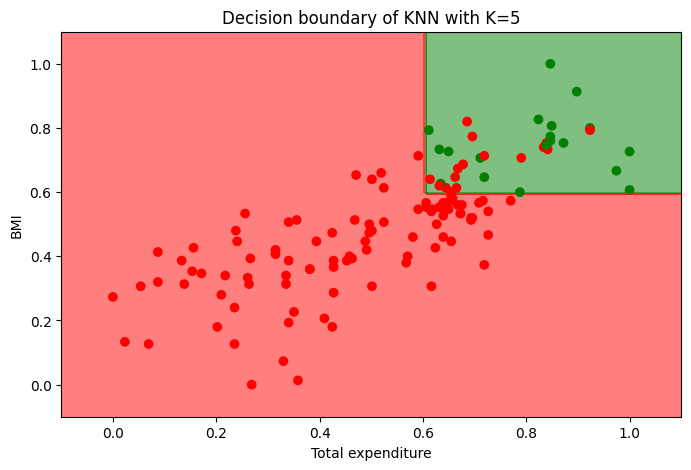

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


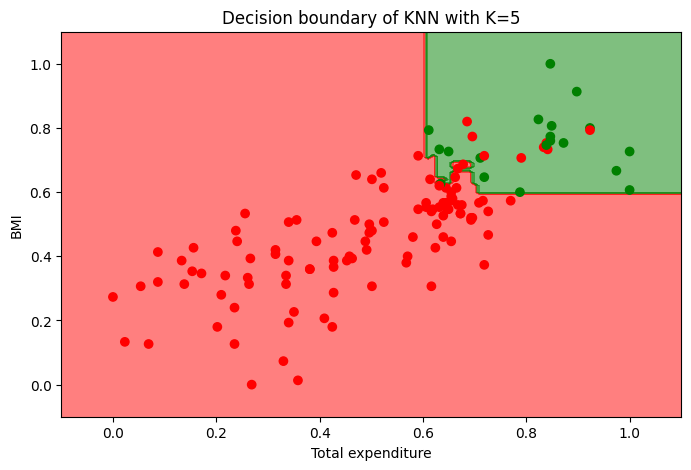

Class 0 Weigths 0.1175435060598341
Class 1 Weigths 0.8824564939401659


In [49]:
# Balance the svm, decision tree, and random forest classifiers by modifying the class_weight parameter

clf2 = SVC(C=2.0, kernel='linear', probability = True, class_weight='balanced')
clf2.fit(np_X_norm, np_Y)

plot_decision_boundary(clf2, np_X_norm, np_Y)


clf3 = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
clf3.fit(np_X_norm, np_Y)

plot_decision_boundary(clf3, np_X_norm, np_Y)



clf4 = RandomForestClassifier(max_depth=3, class_weight='balanced')
clf4.fit(np_X_norm, np_Y)

plot_decision_boundary(clf4, np_X_norm, np_Y)

#Show me the wigths of the decision tree classifier

print("Class 0 Weigths", clf3.feature_importances_[0])
print("Class 1 Weigths", clf3.feature_importances_[1])



**TO CODE 3.3**

Compute the new AUC scores

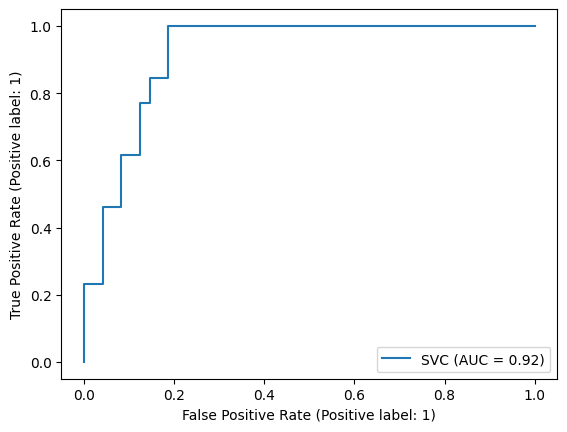

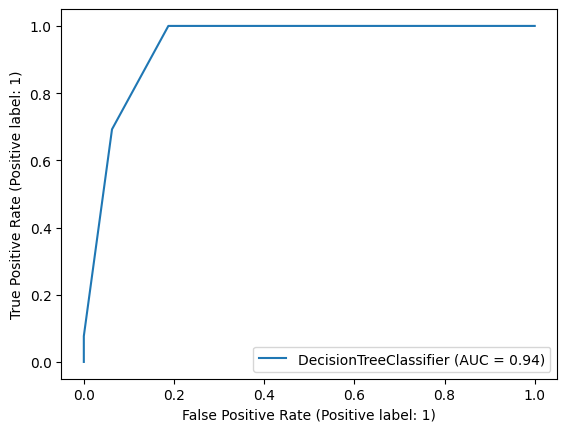

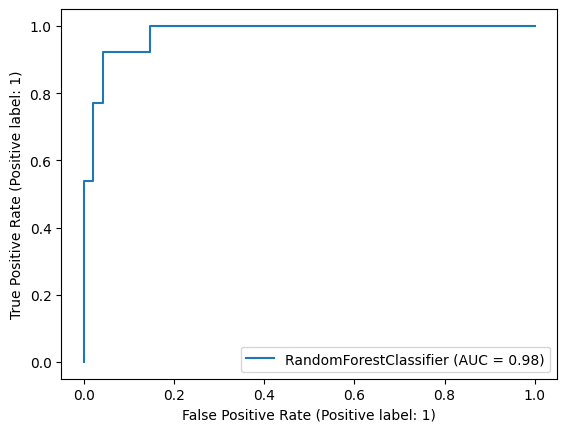

In [32]:

RocCurveDisplay.from_estimator(clf2, np_X_norm, np_Y)
plt.show()


RocCurveDisplay.from_estimator(clf3, np_X_norm, np_Y)
plt.show()

RocCurveDisplay.from_estimator(clf4, np_X_norm, np_Y)
plt.show()

**QUESTION 6**

Why did the AUC scores increase? How do you interpret it?


Because the classifier performs better. By increasing the weights of class 1 the grader does not automatically misclassify many of these points simply due to the imbalance. Adjusting the weights increases the precision of the predictions.


In your opinion, has the classe balance improved the classification?

Yes! 100%


Let's focus on the SVM classifier.

Sklearn allows multiple kernels.

Here is an extract of the documentation:

**kernel** {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’

Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).


**TO CODE 3.4**

Test the gaussian and the polynomial kernels with balanced classes and plot the decision boundaries

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


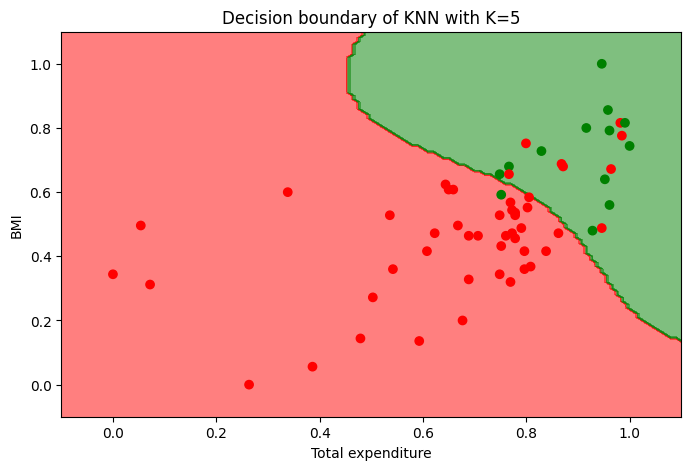

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


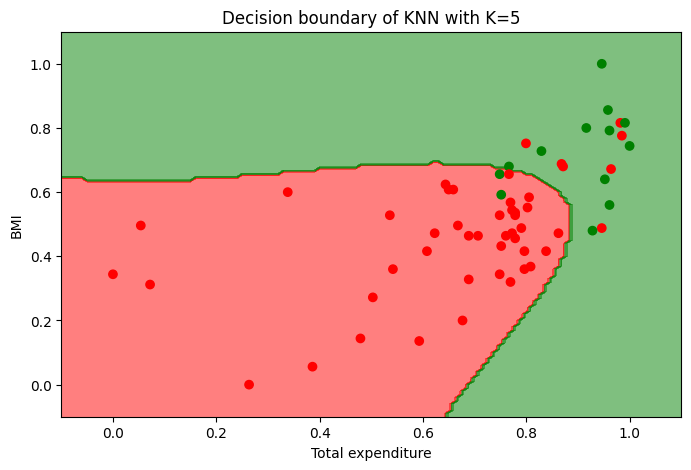

In [33]:


#SVM, Decision Tree, and Random Forest classifiers 


kernels = ['rbf', 'poly']


for kernel in kernels:
    model_svm = SVC(C=2.0, kernel=kernel, probability = True, class_weight= 'balanced')
    model_svm.fit(np_X_norm, np_Y)
    plot_decision_boundary(model_svm, np_X_norm, np_Y)




**QUESTION 7**

In your opinion, which is the best kernel for this dataset? Justify your response

The Gaussian Kerdel fits much better to the "Real" distribution one should expect from this data, and because of that we think it performs better.



## STEP 4: An evaluation dataset

This part is to test the generalization of your models.

You trained several classifiers on two features extracted from the year 2000.

**TO CODE 4.1**

Apply your models on the year 2012

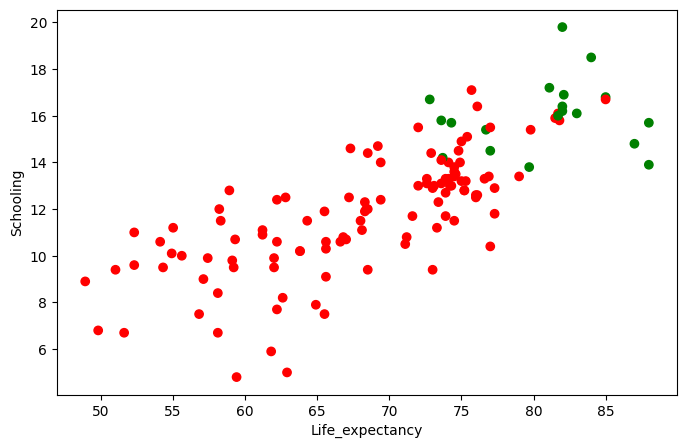

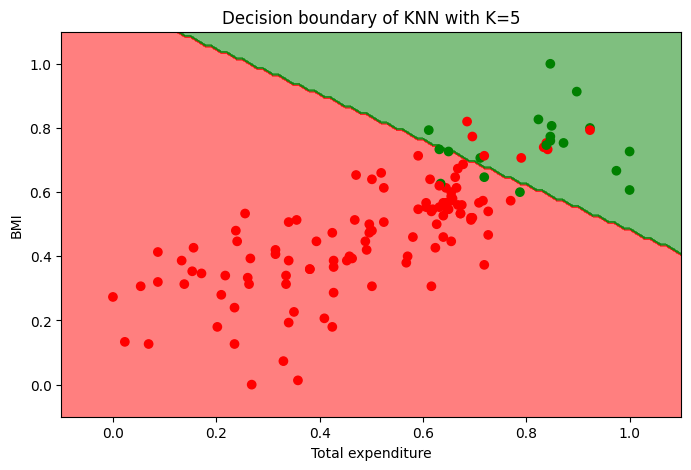

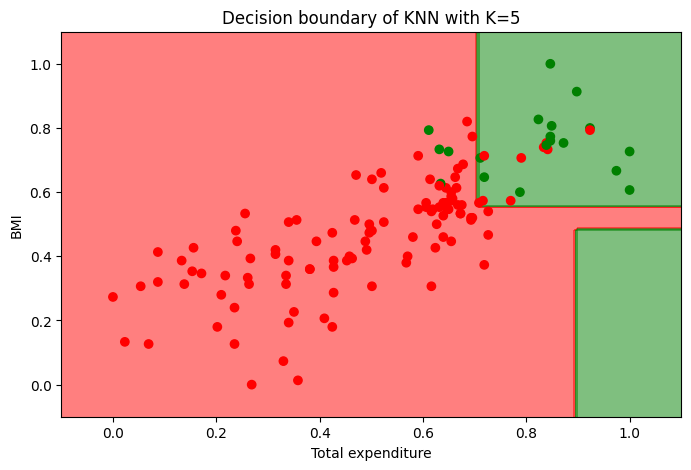

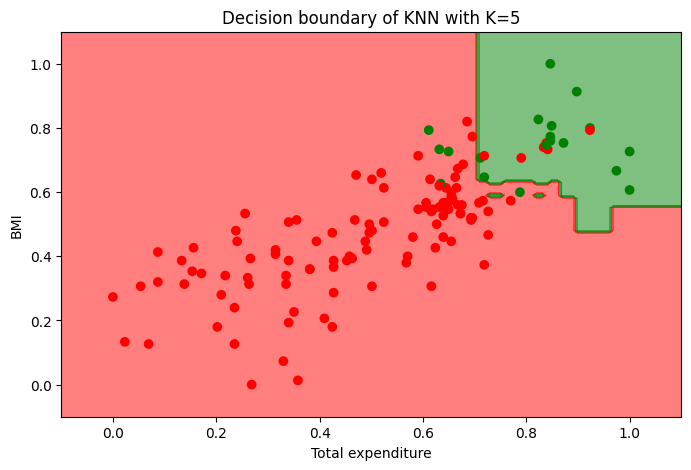

In [34]:



df2012 = df[df.Year == 2011]

df_X = df2012[['Life_expectancy', 'Schooling']]
df_Y = df2012[['Status']].replace(['Developing', 'Developed'], [0, 1])


plt.figure(figsize=(8, 5))
plt.scatter(df_X['Life_expectancy'], df_X['Schooling'], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt.xlabel('Life_expectancy')
plt.ylabel('Schooling')
plt.show()




df_X_norm = (df_X - df_X.min()) / (df_X.max() - df_X.min())
np_X_norm = df_X_norm.to_numpy()
np_Y = df_Y.to_numpy()



plot_decision_boundary(clf2, np_X_norm, np_Y)
plot_decision_boundary(clf3, np_X_norm, np_Y)
plot_decision_boundary(clf4, np_X_norm, np_Y)



### Appliying Dimensional Reduction to this dataset

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Alcohol', 'GDP', 'Income_composition_of_resources', 'Schooling']


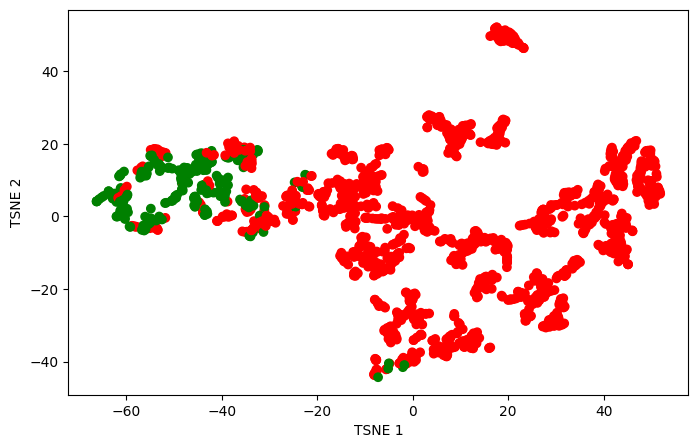

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif




df_X = df.select_dtypes(include='number')

df_Y = df[['Status']].replace(['Developing', 'Developed'], [0, 1])

df_X_norm = (df_X - df_X.min()) / (df_X.max() - df_X.min())

X = df_X_norm
y = df_Y



selector = SelectKBest(score_func=f_classif, k=4) 
X_new = selector.fit_transform(X, y)


selected_features_mask = selector.get_support()


selected_feature_indices = [i for i, selected in enumerate(selected_features_mask) if selected]


selected_feature_names = [X.columns[i] for i in selected_feature_indices]


print(selected_feature_names)



#Apply tsne to the selected features, with n_compnents = 2

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

X_tsne = tsne.fit_transform(df_X_norm[selected_feature_names])




plt.figure(figsize=(8, 5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.show()





In the experiment before we wanted to check if selecting the most important features and appliying dimensional reduction would help with the classification, but after doing many experiments we didn't find a "feature selection" and "Dimensionality reduction" method that reported better results over this data.

**QUESTION 8**

Are your models still relevant in the year 2012?

Yes! As we saw in the previous plots, we visualized the new data from 2012 with the decision boundary of the models trained on the year 20000, and as we can see these models are still relevant and can be used for the classification problem, let's see the AUC with old models and new data

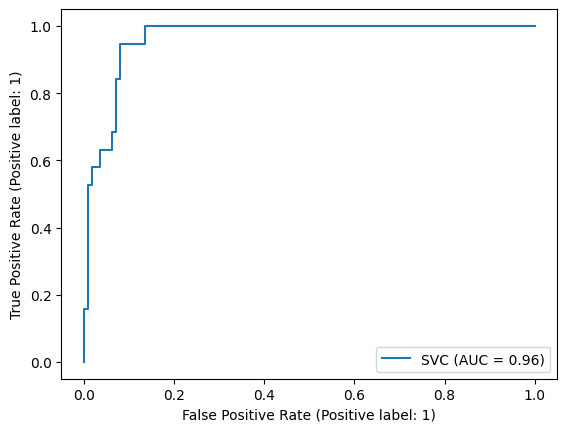

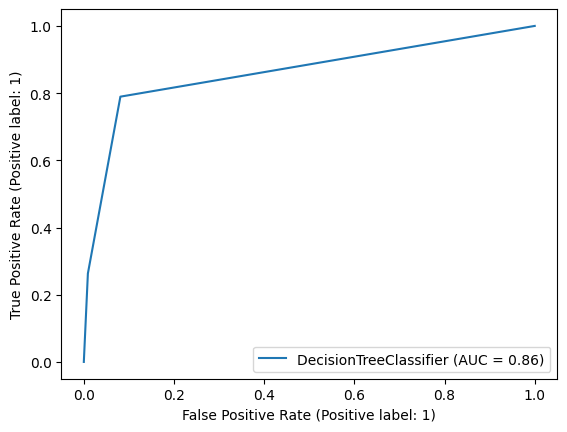

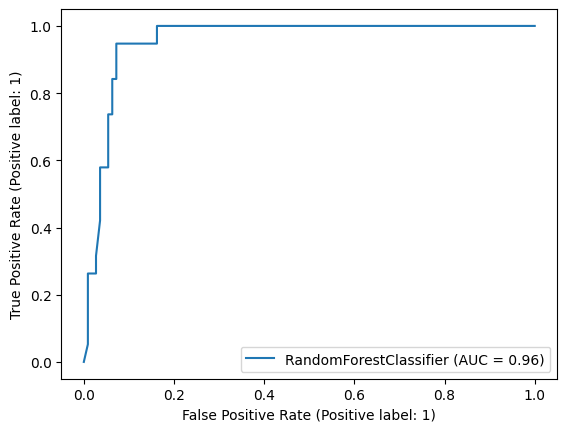

In [ ]:
RocCurveDisplay.from_estimator(clf2, np_X_norm, np_Y)
plt.show()


RocCurveDisplay.from_estimator(clf3, np_X_norm, np_Y)
plt.show()

RocCurveDisplay.from_estimator(clf4, np_X_norm, np_Y)
plt.show()

We can see that with a high AUC, our models remain useful even on new data.